In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import tensorflow as tf

In [59]:
class Network():
    def __init__(self, n_layers, n_neurons, n_inputs=2, n_outputs=1):
        self.input_weights = np.random.normal(size=(n_inputs, n_neurons))
        self.hidden_weights = np.random.normal(size=(n_layers, n_neurons, n_neurons))   
        self.output_weights = np.random.normal(size=(n_neurons, n_outputs))
        self.outputs = np.zeros(shape=(n_layers, n_neurons))
        self.n_layer = n_layers
    
    def forward_pass(self, inputs):
        self.outputs[0, :] = np.arctan(self.input_weights.T @ inputs)
        for layer in range(1, self.n_layer):
            self.outputs[layer, :] = np.arctan(self.outputs[layer - 1, :] @ self.hidden_weights[layer])            
        return np.arctan(self.outputs[-1, :] @ self.output_weights)

In [60]:
net = Network(3, 12)
net.forward_pass([1,1])

array([ 1.37411505])

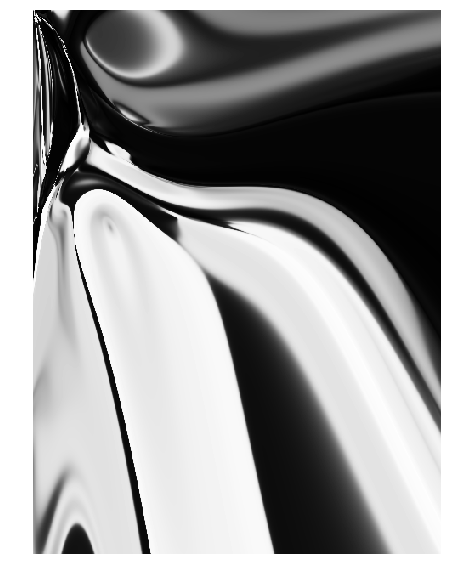

In [35]:
n_layers = 15  
n_neurons = 16 
width = 640   
height = 480

def generate_image(n_layers, n_neurons, width, height, n_in=2, n_out=1):
    """Generate an image pixel by pixel"""
    net = Network(n_layers, n_neurons, n_in, n_out)
    image = np.zeros(shape=(width, height, n_out))
    for i in range(width):
        for j in range(height):
            image[i,j] = net.forward_pass([i/width, j/height])
    return image

image = generate_image(n_layers, n_neurons, width, height) 

def show_image(image, bw=True):
    plt.axis('off')
    plt.imshow(image[:,:,0] if bw else image, cmap='gray' if bw else None)
    
show_image(image)

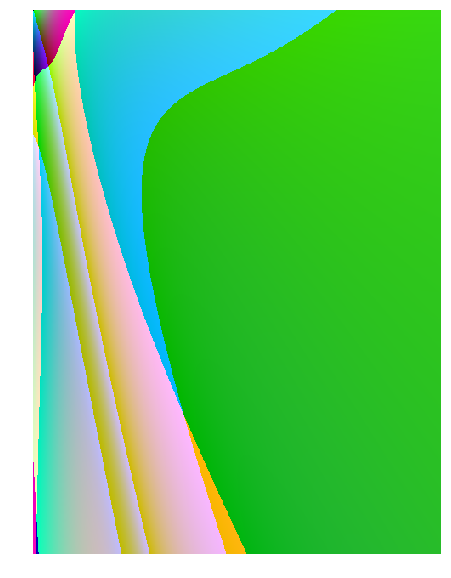

In [36]:
image = generate_image(n_layers=3, n_neurons=10, width=width, height=height, n_out=3) 
show_image(image, bw=False)

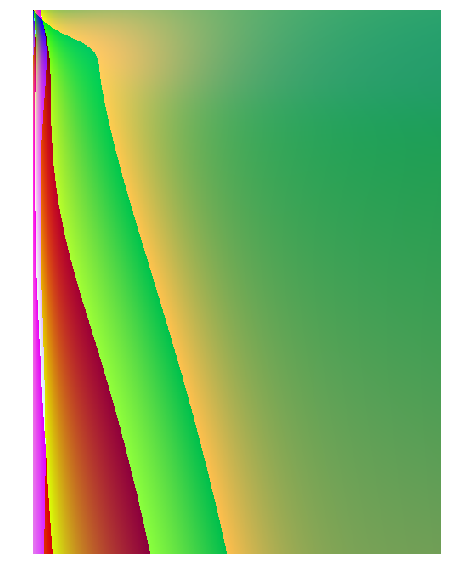

In [37]:
image = generate_image(n_layers=3, n_neurons=10, width=width, height=height, n_out=3) 
show_image(image, bw=False)

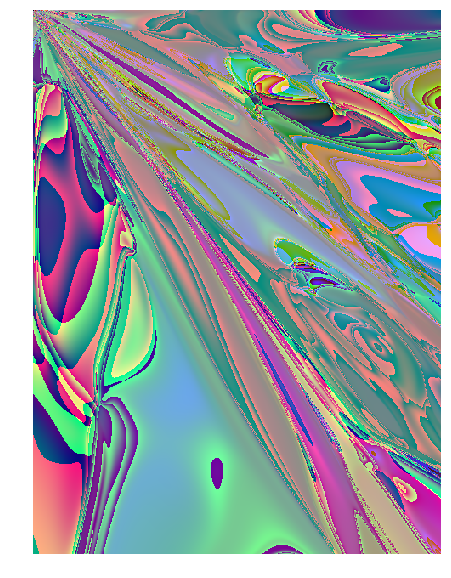

In [38]:
image = generate_image(n_layers=10, n_neurons=30, width=width, height=height, n_out=3) 
show_image(image, bw=False)

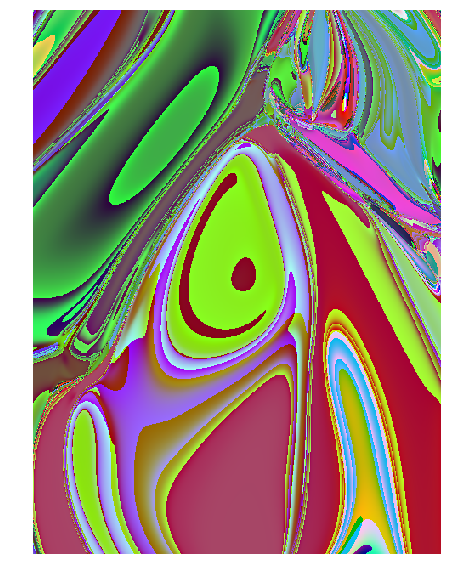

In [39]:
z_dim = 20
net = Network(n_layers, n_neurons, n_inputs=2 + z_dim + 1, n_outputs=3)
z = np.random.normal(size=z_dim)

for i in range(width):
    for j in range(height):
        r = np.sqrt((width/2 - i)**2 + (height/2 - j)**2)
        image[i,j] = net.forward_pass([i/width, j/height, r/width, *z])

show_image(image, bw=False)

In [40]:
z

array([-1.5701229 , -1.37644892, -0.00579913,  1.06983266,  1.29142542,
       -0.83517833, -0.76173115,  0.88562788,  0.24086642, -0.14159717,
       -1.36224254,  1.54908583, -0.29648151, -0.18718001, -1.9620536 ,
       -1.62158008,  1.26080009, -0.42261729,  1.27781884,  0.19625966])

In [42]:
maxx = 6.28
funcs = {'sigmoid':  (lambda x: 1/(1 + np.exp(-x)),
                      lambda x: x * (1 - x),  (0,  1), .45),
            'tanh':  (lambda x: np.tanh(x),
                      lambda x: 1 - x**2,     (0, -1), 0.005),
            'ReLU':  (lambda x: x * (x > 0),
                      lambda x: x > 0,        (0, maxx), 0.0005),
        }

In [47]:
activate = funcs["ReLU"]

<module 'tensorflow.python.ops.nn' from '/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn.py'>